Env name: **cart pole**

Category: **Classic Control**

ALgorothim: **Q-Learning**

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [2]:
# 1. Initialize the CartPole environment with rendering

env = gym.make('CartPole-v1', render_mode='human')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

In [3]:
# 2. Define the number of discrete bins for each state dimension

num_bins = 24  # More bins lead to finer state resolution
state_bins = [
    np.linspace(-4.8, 4.8, num_bins),   # Cart position
    np.linspace(-4, 4, num_bins),       # Cart velocity
    np.linspace(-0.418, 0.418, num_bins),  # Pole angle
    np.linspace(-4, 4, num_bins)        # Pole angular velocity
]

In [4]:
# 3. Set hyperparameters for the Q-learning algorithm

learning_rate = 0.1    # The rate at which the agent updates its Q-values
discount_factor = 0.99  # The discount factor for future rewards
epsilon = 1.0          # Initial exploration rate
epsilon_min = 0.01     # Minimum exploration rate
epsilon_decay = 0.995   # Decay rate for epsilon
episodes = 1000        # Number of training episodes
max_steps = 200        # Maximum steps per episode
rewards = []           # List to store total rewards for each episode

In [5]:
# 4. Initialize the Q-table

q_table = np.zeros([num_bins] * state_size + [action_size])

In [6]:
# 5. Function to discretize the continuous state into a discrete state index

def discretize_state(state):
    state_index = []
    for i in range(len(state)):
        state_index.append(np.digitize(state[i], state_bins[i]) - 1)
    return tuple(state_index)

In [7]:
# 6. Function to choose an action using the epsilon-greedy policy

def choose_action(discrete_state, epsilon):
    if np.random.rand() <= epsilon:
        return env.action_space.sample()  # Random action (exploration)
    return np.argmax(q_table[discrete_state])  # Best action (exploitation)

In [8]:
# 7. Function to plot the smoothed rewards over episodes

def plot_rewards(rewards):
    window_size = 10
    smoothed_rewards = np.convolve(rewards, np.ones(window_size) / window_size, mode='valid')

    plt.figure(figsize=(10, 6))
    plt.plot(smoothed_rewards, label='Smoothed Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Q-Learning Performance Over Episodes')
    plt.legend()
    plt.show()

In [9]:
# 8. Function to test the trained agent

def test_agent(env, episodes=5):
    for episode in range(episodes):
        state, _ = env.reset()
        discrete_state = discretize_state(state)
        total_reward = 0
        done = False

        for step in range(max_steps):
            action = np.argmax(q_table[discrete_state])  # Choose the best action
            next_state, reward, done, truncated, _ = env.step(action)
            discrete_state = discretize_state(next_state)
            total_reward += reward
            
            env.render()  # Render the environment

            if done or truncated:
                break
        
        print(f"Test Episode {episode+1}, Total Reward: {total_reward}")

    env.close()

In [10]:
# 9. Q-learning algorithm
for episode in range(episodes):
    state, _ = env.reset()
    discrete_state = discretize_state(state)
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(discrete_state, epsilon)  # Choose action based on epsilon-greedy
        next_state, reward, done, truncated, _ = env.step(action)
        discrete_next_state = discretize_state(next_state)
        
        # Update Q-value
        q_table[discrete_state + (action,)] += learning_rate * (
            reward + discount_factor * np.max(q_table[discrete_next_state]) - q_table[discrete_state + (action,)]
        )

        discrete_state = discrete_next_state
        total_reward += reward

        if done or truncated:
            break

    rewards.append(total_reward)

    # Decay epsilon to gradually reduce exploration
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    print(f"Episode {episode+1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}")

Episode 1/1000, Total Reward: 22.0, Epsilon: 0.9950
Episode 2/1000, Total Reward: 26.0, Epsilon: 0.9900
Episode 3/1000, Total Reward: 31.0, Epsilon: 0.9851
Episode 4/1000, Total Reward: 59.0, Epsilon: 0.9801
Episode 5/1000, Total Reward: 11.0, Epsilon: 0.9752
Episode 6/1000, Total Reward: 34.0, Epsilon: 0.9704
Episode 7/1000, Total Reward: 11.0, Epsilon: 0.9655
Episode 8/1000, Total Reward: 17.0, Epsilon: 0.9607
Episode 9/1000, Total Reward: 38.0, Epsilon: 0.9559
Episode 10/1000, Total Reward: 50.0, Epsilon: 0.9511
Episode 11/1000, Total Reward: 15.0, Epsilon: 0.9464
Episode 12/1000, Total Reward: 38.0, Epsilon: 0.9416
Episode 13/1000, Total Reward: 22.0, Epsilon: 0.9369
Episode 14/1000, Total Reward: 18.0, Epsilon: 0.9322
Episode 15/1000, Total Reward: 14.0, Epsilon: 0.9276
Episode 16/1000, Total Reward: 12.0, Epsilon: 0.9229
Episode 17/1000, Total Reward: 25.0, Epsilon: 0.9183
Episode 18/1000, Total Reward: 28.0, Epsilon: 0.9137
Episode 19/1000, Total Reward: 21.0, Epsilon: 0.9092
Ep

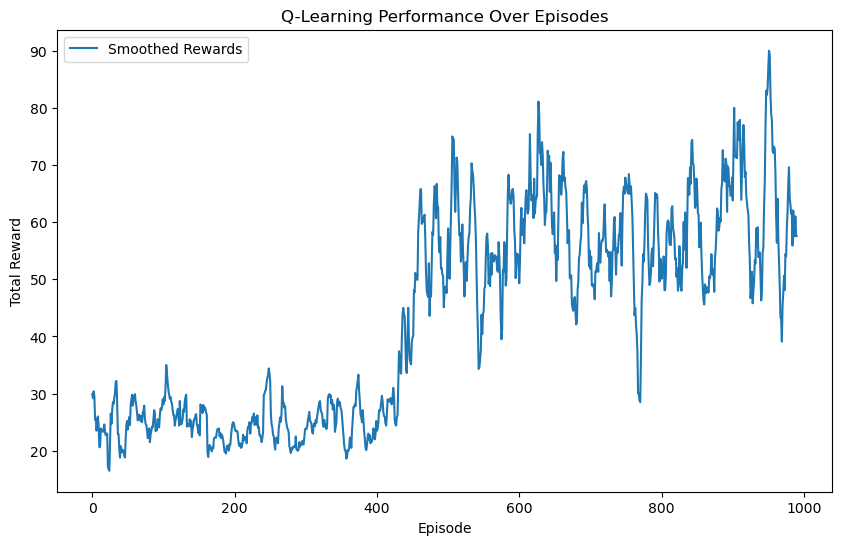

In [11]:
# 10. Plot the training rewards

plot_rewards(rewards)

In [12]:
# 11. Test the trained agent

print("Testing the trained agent:")
test_agent(env, episodes=15)

Testing the trained agent:
Test Episode 1, Total Reward: 19.0
Test Episode 2, Total Reward: 48.0
Test Episode 3, Total Reward: 99.0
Test Episode 4, Total Reward: 58.0
Test Episode 5, Total Reward: 110.0
Test Episode 6, Total Reward: 102.0
Test Episode 7, Total Reward: 46.0
Test Episode 8, Total Reward: 27.0
Test Episode 9, Total Reward: 107.0
Test Episode 10, Total Reward: 53.0
Test Episode 11, Total Reward: 107.0
Test Episode 12, Total Reward: 85.0
Test Episode 13, Total Reward: 23.0
Test Episode 14, Total Reward: 60.0
Test Episode 15, Total Reward: 26.0
